<a href="https://colab.research.google.com/github/ManyaGupta23/Work-Sample-Portfolio/blob/main/College_event_feedback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()


Saving Student Event Feedback Data - Form responses 1.csv to Student Event Feedback Data - Form responses 1.csv


In [6]:
import pandas as pd

file_name = list(uploaded.keys())[0]   # automatically gets uploaded file
df = pd.read_csv(file_name)

df.head()


,Timestamp,Department,Year of Study,Event Type,Overall Rating of the Event,What did you like about the event?,What can be improved in future events?,Would you recommend this event to others?
0,14/12/2025 15:47:11,BCA,3rd Year,Sports Event,5,I enjoy this event because i love sport,NaN,Yes
1,14/12/2025 15:54:21,BSc,1st Year,Cultural Event,3,Great performance,NaN,Yes
2,14/12/2025 15:55:16,BSc,2nd Year,Cultural Event,4,Fun and Entertainment,NaN,Yes
3,14/12/2025 15:56:16,BCA,3rd Year,Cultural Event,4,Well Organized,NaN,Yes
4,14/12/2025 15:57:15,other,1st Year,Cultural Event,4,Great Performance,NaN,Yes


In [15]:
df.rename(columns={
    'Year of Study': 'Year',
    'Event Type': 'Event_Type',
    'Overall Rating of the Event': 'Rating',
    'What did you like about the event?': 'Likes',
    'What can be improved in future events?': 'Improvements',
    'Would you recommend this event to others?': 'Recommend'
}, inplace=True)
df.columns
df['Improvements'] = df['Improvements'].fillna("No suggestion")


In [9]:
!pip install textblob nltk wordcloud
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')
sns.set(style="whitegrid")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
# TextBlob sentiment
df['Likes_Polarity'] = df['Likes'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['Improvements_Polarity'] = df['Improvements'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# VADER sentiment
sia = SentimentIntensityAnalyzer()
df['Likes_VADER'] = df['Likes'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
df['Improvements_VADER'] = df['Improvements'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

df.head()


,Timestamp,Department,Year,Event_Type,Rating,Likes,Improvements,Recommend,Likes_Polarity,Improvements_Polarity,Likes_VADER,Improvements_VADER
0,14/12/2025 15:47:11,BCA,3rd Year,Sports Event,5,I enjoy this event because i love sport,No suggestion,Yes,0.45,0.0,0.8126,-0.296
1,14/12/2025 15:54:21,BSc,1st Year,Cultural Event,3,Great performance,No suggestion,Yes,0.80,0.0,0.6249,-0.296
2,14/12/2025 15:55:16,BSc,2nd Year,Cultural Event,4,Fun and Entertainment,No suggestion,Yes,0.30,0.0,0.7269,-0.296
3,14/12/2025 15:56:16,BCA,3rd Year,Cultural Event,4,Well Organized,No suggestion,Yes,0.00,0.0,0.2732,-0.296
4,14/12/2025 15:57:15,other,1st Year,Cultural Event,4,Great Performance,No suggestion,Yes,0.80,0.0,0.6249,-0.296


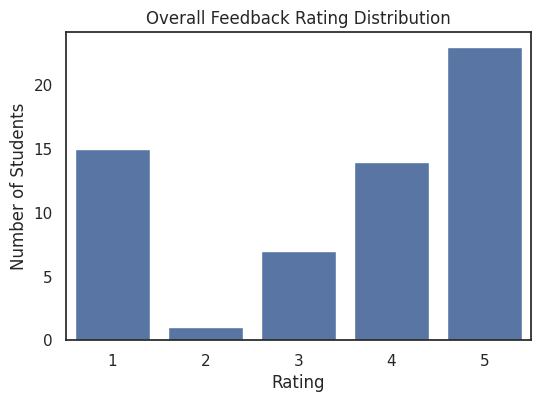

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Rating')
plt.title('Overall Feedback Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Students')
plt.show()


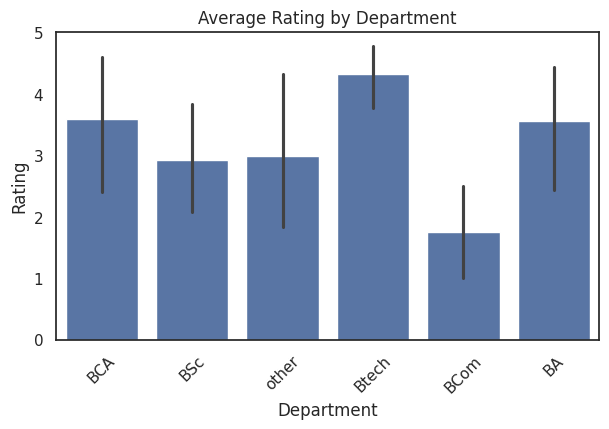

In [20]:
plt.figure(figsize=(7,4))
sns.barplot(data=df, x='Department', y='Rating')
plt.title('Average Rating by Department')
plt.xticks(rotation=45)
plt.show()


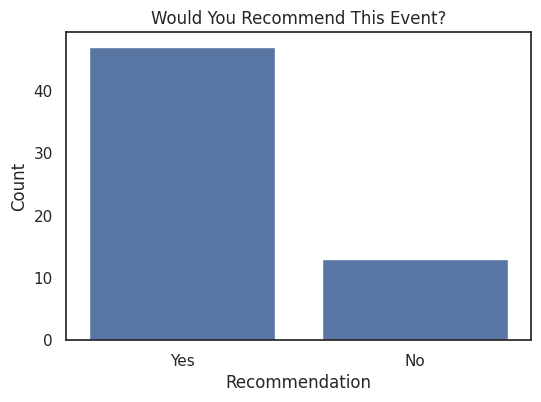

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Recommend')
plt.title('Would You Recommend This Event?')
plt.xlabel('Recommendation')
plt.ylabel('Count')
plt.show()


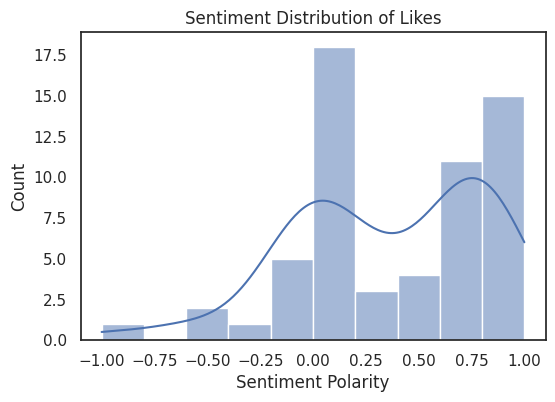

In [22]:
plt.figure(figsize=(6,4))
sns.histplot(df['Likes_Polarity'], bins=10, kde=True)
plt.title('Sentiment Distribution of Likes')
plt.xlabel('Sentiment Polarity')
plt.show()


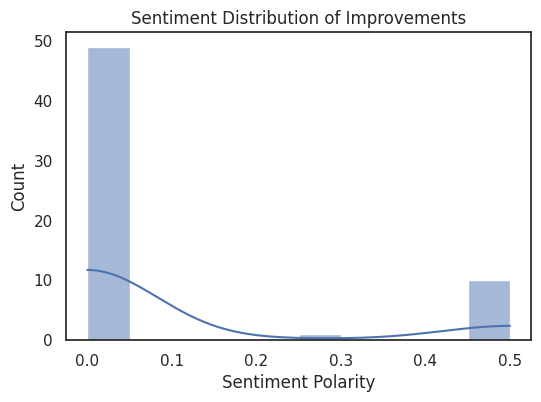

In [23]:
plt.figure(figsize=(6,4))
sns.histplot(df['Improvements_Polarity'], bins=10, kde=True)
plt.title('Sentiment Distribution of Improvements')
plt.xlabel('Sentiment Polarity')
plt.show()


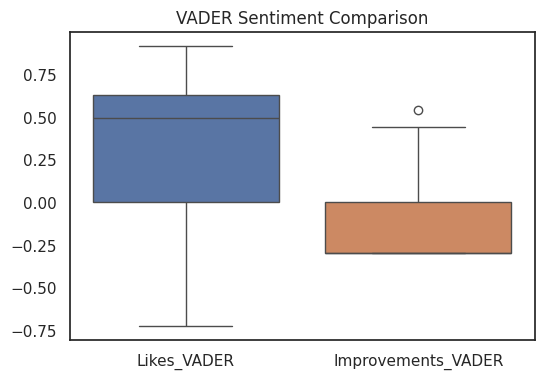

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df[['Likes_VADER', 'Improvements_VADER']])
plt.title('VADER Sentiment Comparison')
plt.show()


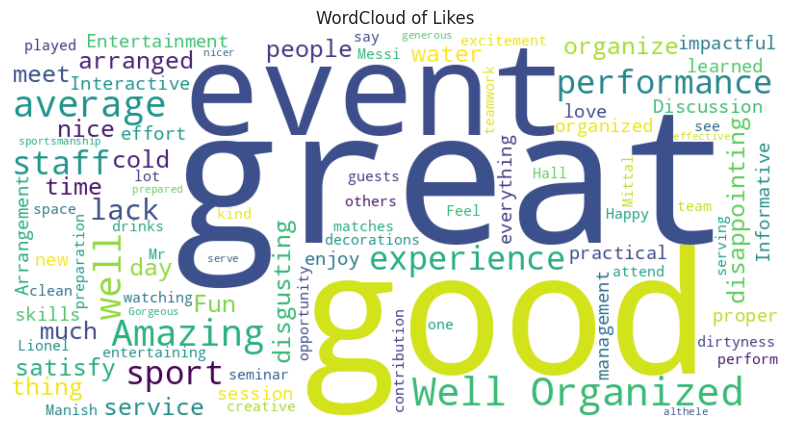

In [25]:
from wordcloud import WordCloud

likes_text = " ".join(df['Likes'].astype(str))
wc = WordCloud(width=800, height=400, background_color='white').generate(likes_text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Likes')
plt.show()


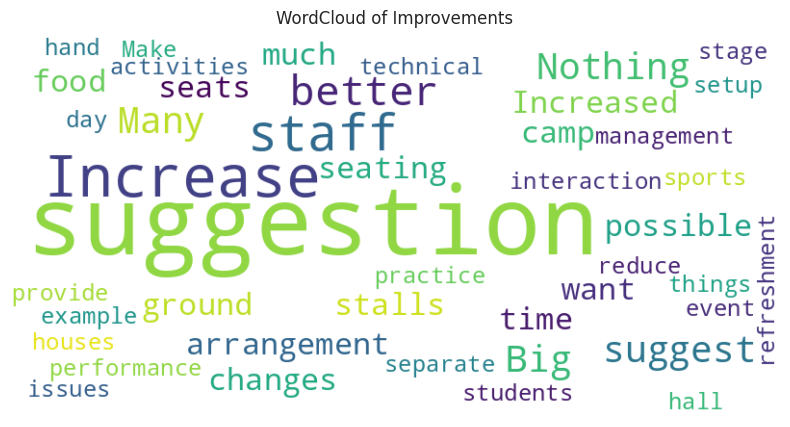

In [26]:
improve_text = " ".join(df['Improvements'].astype(str))
wc2 = WordCloud(width=800, height=400, background_color='white').generate(improve_text)

plt.figure(figsize=(10,5))
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Improvements')
plt.show()


In [28]:
df['Sentiment_Label'] = df['Likes_Polarity'].apply(
    lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral'
)
df['Sentiment_Label'].value_counts(normalize=True) * 100


,proportion
Sentiment_Label,
Positive,66.666667
Neutral,18.333333
Negative,15.000000


In [29]:
event_rank = df.groupby('Event_Type')['Rating'].mean().sort_values(ascending=False)
event_rank


,Rating
Event_Type,
"Seminar, Workshop, Cultural Event, Sports Event",5.000000
Sports Event,4.000000
Seminar,3.500000
Workshop,3.222222
Cultural Event,2.533333


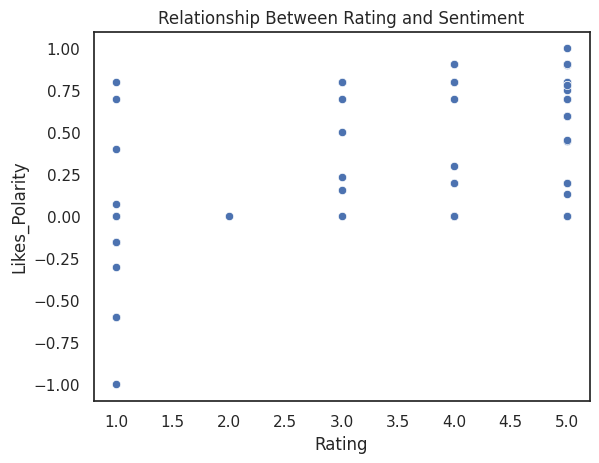

In [30]:
sns.scatterplot(data=df, x='Rating', y='Likes_Polarity')
plt.title('Relationship Between Rating and Sentiment')
plt.show()


In [31]:
print("Best Event:", event_rank.idxmax())
print("Average Rating:", round(df['Rating'].mean(),2))
print("Recommendation Rate:",
      round((df['Recommend']=='Yes').mean()*100,2), "%")


Best Event: Seminar, Workshop, Cultural Event, Sports Event
Average Rating: 3.48
Recommendation Rate: 78.33 %
